**Evaluación 4**

Caso: TweetsClasificacion

Notebook basado en el trabajo entregado por los alumnos Michell Miranda/ Denisse Alcántara/ Diego Concha

Asignatura: DEEP LEARNING - DLY0100 -002V

Docente: Jorge Anais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Bidirectional, Dense, Embedding, GRU, LSTM, SimpleRNN


In [2]:
# Configurar TensorFlow para utilizar GPU
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv(
    "/content/drive/MyDrive/2023-1/DLY0100/notebooks/ev4_jorge/TweetsClasificacion.csv",
    names=['sentimientos', 'comentarios'],
    sep=';',
)

# Carga de datos

In [5]:
# Mapear los sentimientos a valores numéricos
label_encoder = LabelEncoder()
data['sentimientos'] = label_encoder.fit_transform(data['sentimientos'])

In [6]:
# Preprocesamiento de los datos
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['comentarios'])
sequences = tokenizer.texts_to_sequences(data['comentarios'])
padded_sequences = pad_sequences(sequences)

In [7]:
# Dividir los datos en entrenamiento y prueba
X = padded_sequences
y = data['sentimientos']
num_classes = len(set(y))
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)


COMENTARIO PROFESOR

In [8]:
# Para evitar el desbalance de datos mejor hacer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

FIN COMENTARIO PROFESOR

# Red recurrente simple

In [9]:
model_simple = Sequential()
model_simple = Sequential()
model_simple.add(
    Embedding(
        input_dim=len(tokenizer.word_index) + 1,
        output_dim=100,
        input_length=X.shape[1],
        trainable=False,  # Notar que no entrenamos la capa de embedding
    )
)
model_simple.add(SimpleRNN(128))
model_simple.add(Dense(num_classes, activation='softmax'))

In [10]:
# Compilar y entrenar el modelo
model_simple.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model_simple.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 52, 100)           40291300  
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               29312     
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 40,320,870
Trainable params: 29,570
Non-trainable params: 40,291,300
_________________________________________________________________


In [13]:
history_simple = model_simple.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/10
8750/8750 [==============================] - 493s 56ms/step - loss: 0.6494 - accuracy: 0.6199 - val_loss: 0.6429 - val_accuracy: 0.6292
Epoch 2/10
8750/8750 [==============================] - 477s 55ms/step - loss: 0.6485 - accuracy: 0.6207 - val_loss: 0.6498 - val_accuracy: 0.6198
Epoch 3/10
8750/8750 [==============================] - 490s 56ms/step - loss: 0.6468 - accuracy: 0.6268 - val_loss: 0.6459 - val_accuracy: 0.6261
Epoch 4/10
8750/8750 [==============================] - 463s 53ms/step - loss: 0.6421 - accuracy: 0.6314 - val_loss: 0.6346 - val_accuracy: 0.6382
Epoch 5/10
8750/8750 [==============================] - 463s 53ms/step - loss: 0.6323 - accuracy: 0.6380 - val_loss: 0.6225 - val_accuracy: 0.6479
Epoch 6/10
8750/8750 [==============================] - 484s 55ms/step - loss: 0.6166 - accuracy: 0.6519 - val_loss: 0.6025 - val_accuracy: 0.6683
Epoch 7/10
8750/8750 [==============================] - 501s 57ms/step - loss: 0.5890 - accuracy: 0.6797 - val_loss: 0

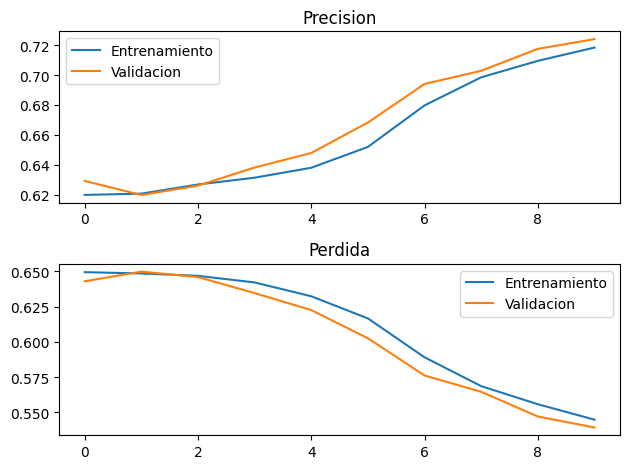

In [14]:
plt.subplot(211)
plt.title('Precision')
plt.plot(history_simple.history['accuracy'], label='Entrenamiento')
plt.plot(history_simple.history['val_accuracy'], label='Validacion')
plt.legend(loc='upper left')

plt.subplot(212)
plt.title('Perdida')
plt.plot(history_simple.history['loss'], label='Entrenamiento')
plt.plot(history_simple.history['val_loss'], label='Validacion')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Red Recurrente LSTM

In [15]:
model = Sequential()
model = Sequential()
model.add(
    Embedding(
        input_dim=len(tokenizer.word_index) + 1,
        output_dim=100,
        input_length=X.shape[1],
        trainable=False,  # Notar que no entrenamos la capa de embedding
    )
)
model.add(LSTM(128))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
# Compilar y entrenar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 52, 100)           40291300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 40,408,806
Trainable params: 117,506
Non-trainable params: 40,291,300
_________________________________________________________________


In [18]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/10
8750/8750 [==============================] - 69s 8ms/step - loss: 0.5808 - accuracy: 0.6861 - val_loss: 0.5331 - val_accuracy: 0.7300
Epoch 2/10
8750/8750 [==============================] - 66s 7ms/step - loss: 0.4996 - accuracy: 0.7519 - val_loss: 0.4819 - val_accuracy: 0.7656
Epoch 3/10
8750/8750 [==============================] - 66s 8ms/step - loss: 0.4660 - accuracy: 0.7752 - val_loss: 0.4572 - val_accuracy: 0.7813
Epoch 4/10
8750/8750 [==============================] - 65s 7ms/step - loss: 0.4471 - accuracy: 0.7876 - val_loss: 0.4439 - val_accuracy: 0.7899
Epoch 5/10
8750/8750 [==============================] - 66s 8ms/step - loss: 0.4342 - accuracy: 0.7954 - val_loss: 0.4363 - val_accuracy: 0.7948
Epoch 6/10
8750/8750 [==============================] - 68s 8ms/step - loss: 0.4241 - accuracy: 0.8016 - val_loss: 0.4333 - val_accuracy: 0.7971
Epoch 7/10
8750/8750 [==============================] - 65s 7ms/step - loss: 0.4162 - accuracy: 0.8062 - val_loss: 0.4246 - val_ac

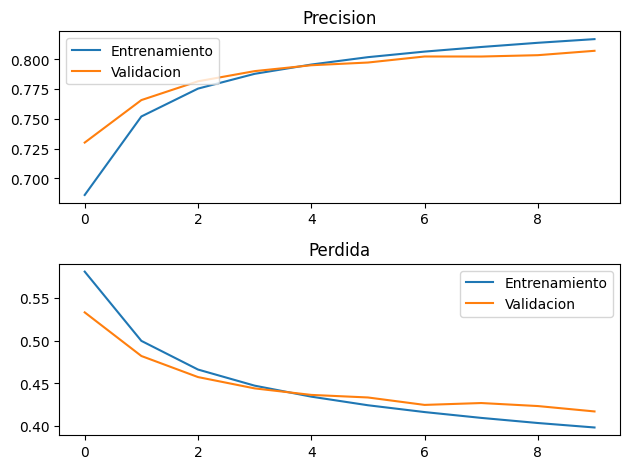

In [19]:
plt.subplot(211)
plt.title('Precision')
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validacion')
plt.legend(loc='upper left')

plt.subplot(212)
plt.title('Perdida')
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validacion')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Red recurrente LSTM bidireccional

In [20]:
# RNN LSTM bidireccional
model_bi = Sequential()
model_bi.add(
    Embedding(
        input_dim=len(tokenizer.word_index) + 1,\
        output_dim=100,
        input_length=X.shape[1],
        trainable=False,
    )
)
model_bi.add(Bidirectional(LSTM(128)))
model_bi.add(Dense(num_classes, activation='softmax'))

In [21]:
# Compilar el modelo
model_bi.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
model_bi.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 52, 100)           40291300  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 40,526,310
Trainable params: 235,010
Non-trainable params: 40,291,300
_________________________________________________________________


In [23]:
history_bi = model_bi.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/10
8750/8750 [==============================] - 114s 12ms/step - loss: 0.5828 - accuracy: 0.6848 - val_loss: 0.5330 - val_accuracy: 0.7265
Epoch 2/10
8750/8750 [==============================] - 107s 12ms/step - loss: 0.5033 - accuracy: 0.7490 - val_loss: 0.4848 - val_accuracy: 0.7633
Epoch 3/10
8750/8750 [==============================] - 102s 12ms/step - loss: 0.4698 - accuracy: 0.7724 - val_loss: 0.4595 - val_accuracy: 0.7792
Epoch 4/10
8750/8750 [==============================] - 102s 12ms/step - loss: 0.4510 - accuracy: 0.7847 - val_loss: 0.4523 - val_accuracy: 0.7847
Epoch 5/10
8750/8750 [==============================] - 102s 12ms/step - loss: 0.4379 - accuracy: 0.7928 - val_loss: 0.4405 - val_accuracy: 0.7917
Epoch 6/10
8750/8750 [==============================] - 108s 12ms/step - loss: 0.4278 - accuracy: 0.7993 - val_loss: 0.4352 - val_accuracy: 0.7956
Epoch 7/10
8750/8750 [==============================] - 102s 12ms/step - loss: 0.4191 - accuracy: 0.8044 - val_loss: 0

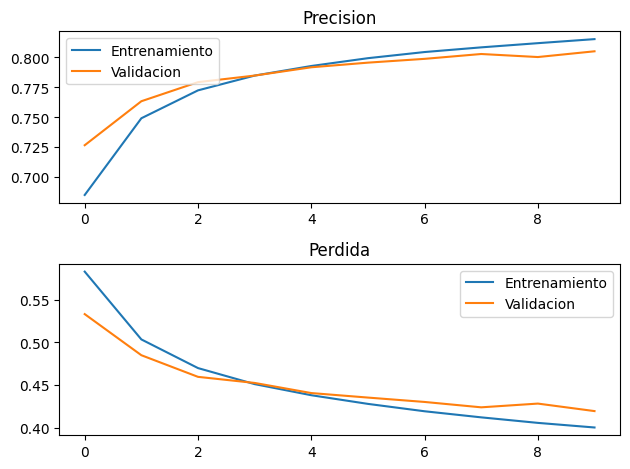

In [24]:
plt.subplot(211)
plt.title('Precision')
plt.plot(history_bi.history['accuracy'], label='Entrenamiento')
plt.plot(history_bi.history['val_accuracy'], label='Validacion')
plt.legend(loc='upper left')

plt.subplot(212)
plt.title('Perdida')
plt.plot(history_bi.history['loss'], label='Entrenamiento')
plt.plot(history_bi.history['val_loss'], label='Validacion')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()